In [1]:
import sys, math

## EDA tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Import the necessary libraries if you are starting a new notebook.
2. Load the continuous and discrete variables into `continuous_df` and `discrete_df` variables.
3. Plot a correlation matrix, what can you see?
4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
5. What can you see in the plots?
6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
7. Have you found outliers? If you have, what should we do with them?
8. Check nan values per column.
9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.
10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
11. Get categorical features.
12. What should we do with the customer id column?

##### 1. Import the necessary libraries if you are starting a new notebook.
##### 2. Load the continuous and discrete variables into continuous_df and discrete_df variables.
##### 3. Plot a correlation matrix, what can you see?

In [4]:
! ls ../week_9/lab_cleaning_numerical_data/

cleaning_numerical_data.ipynb files_for_lab
continuous_csv                readme.md
discrete_csv


In [8]:
path = '../week_9/lab_cleaning_numerical_data/'
continuous_df = pd.read_csv(path + 'continuous.csv')
discrete_df = pd.read_csv(path + 'discrete.csv')

In [10]:
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


In [11]:
discrete_df.head()

,effective_to_date,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2011-02-24,69,32,5,0,1
1,2011-01-31,94,13,42,0,8
2,2011-02-19,108,18,38,0,2
3,2011-01-20,106,18,65,0,7
4,2011-02-03,73,12,44,0,1


<AxesSubplot:>

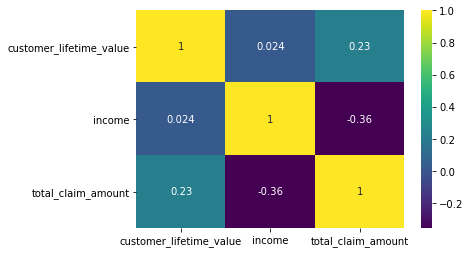

In [14]:
sns.heatmap(continuous_df.corr(), annot=True, cmap='viridis')

<AxesSubplot:>

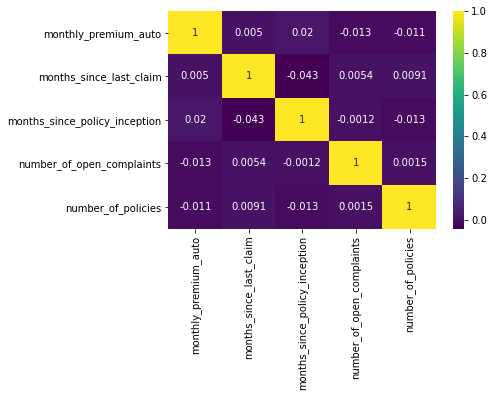

In [15]:
sns.heatmap(discrete_df.corr(), annot=True, cmap='viridis')

<AxesSubplot:>

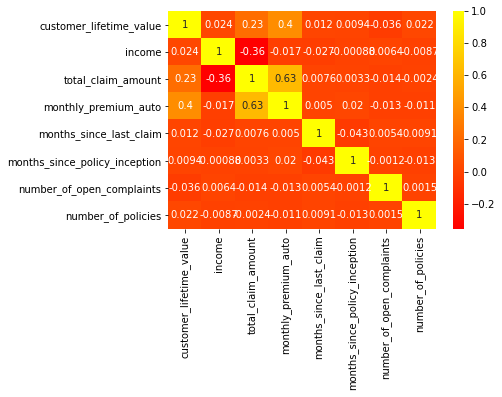

In [19]:
sns.heatmap(pd.concat([continuous_df, discrete_df],axis=1).corr(), annot=True, cmap='autumn')

In [20]:
## We can see that there is little correlation except in the continuous values (this may be expected),
## And the monthly_premium_auto also shows some correlation with the continuous values.

##### Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
##### Have you found outliers? If you have, what should we do with them?

In [29]:
pd.concat([continuous_df, discrete_df.monthly_premium_auto], axis=1)
## As monthly premium auto is behaving like a discrete value I would run it as so.

,customer_lifetime_value,income,total_claim_amount,monthly_premium_auto
0,2763.519279,56274,384.811147,69
1,6979.535903,0,1131.464935,94
2,12887.431650,48767,566.472247,108
3,7645.861827,0,529.881344,106
4,2813.692575,43836,138.130879,73
...,...,...,...,...
9129,23405.987980,71941,198.234764,73
9130,3096.511217,21604,379.200000,79
9131,8163.890428,0,790.784983,85
9132,7524.442436,21941,691.200000,96


<AxesSubplot:xlabel='customer_lifetime_value'>

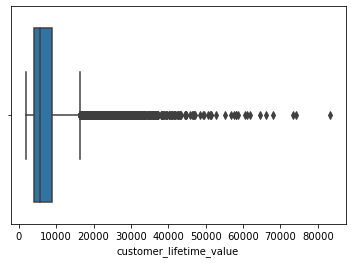

In [32]:
sns.boxplot(data=continuous_df,x='customer_lifetime_value')

<AxesSubplot:xlabel='income'>

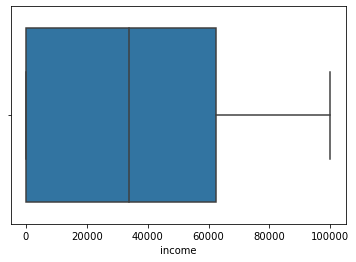

In [33]:
sns.boxplot(data=continuous_df,x='income')

<AxesSubplot:xlabel='total_claim_amount'>

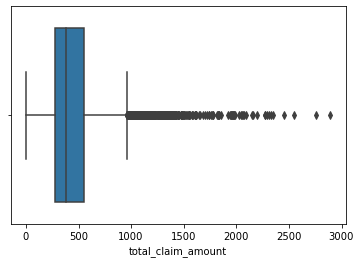

In [34]:
sns.boxplot(data=continuous_df,x='total_claim_amount')

<AxesSubplot:xlabel='monthly_premium_auto'>

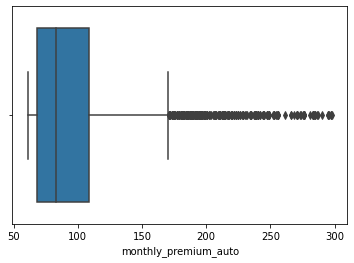

In [35]:
sns.boxplot(data=discrete_df,x='monthly_premium_auto')

The first thing we can do is try apply a **log transformation** to **total_claim_amount** and **customer_life_time value**.
<br>For might want to have a better look at their **distributions** and try to understand what this values **represent**.

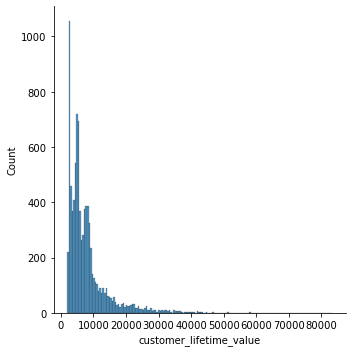

In [36]:
sns.displot(data=continuous_df, x='customer_lifetime_value')

In [41]:
continuous_df.customer_lifetime_value.sort_values().iloc[8500:8510]

1730    19014.47625
5041    19045.50012
834     19069.49954
5712    19079.09518
3769    19088.34203
1462    19116.56806
2607    19160.98994
4848    19160.98994
1200    19160.98994
1364    19160.98994
Name: customer_lifetime_value, dtype: float64

#### Check nan values per column.

In [27]:
pd.concat([continuous_df, discrete_df],axis=1).isna().sum()
## There are none

customer_lifetime_value          0
income                           0
total_claim_amount               0
effective_to_date                0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
dtype: int64